# Loan Approval Prediction Using Deep Learning Approach

This project aims to develop a deep learning model to assist a bank in determining whether a customer's loan application should be approved or rejected, using binary classification. The model is built using a Back Propagation Neural Network (BPNN) architecture, with an additional modified version designed to enhance the model's accuracy. Through this approach, we aim to improve the bank's decision-making process by providing a more reliable and efficient prediction system for loan approvals.

### Import libraries and Read Data

In [127]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('Bank_Loan_Granting.csv')

In [130]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


About Dataset <br>
This dataset has 5000 samples with 14 features.

Columns Descriptions :

- ID : customer ID
- Age : age of customer
- Experience : the number of years that the customer has experience
- Income : the customer's annual earnings
- ZIP Code : the postal code of the customer's location
- Family : the number of people in the customer's family
- CCAvg : the average monthly credit card spending
- Education : the level of customer's Education(undergraduate,graduate,professional)
- Mortgage : the Value of the customer's mortgage(the thing that the customer uses as a guarantee to the bank)
- Securities Account : whether the customer has a security account or not(it's also known as an investment account)
- CD Account : the customer has a CD account or not(a type of savings account that lets the customer earn interest on a fixed amount of money for a fixed period)
- Online : the customer uses the bank's online services or not
- CreditCard : the customer uses the bank's credit card or not
- Personal Loan : the customer is granted loans or not <br><br>
The target variable is `Personal Loan`





In [131]:
df.shape

(5000, 14)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [133]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [134]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

We can see that there is no missing value, and that is a good thing!

Now we want to see the value counts of each column

In [135]:
columns = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for i in columns:
    print(df[i].value_counts())
    print()

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

Personal Loan
0    4520
1     480
Name: count, dtype: int64

Securities Account
0    4478
1     522
Name: count, dtype: int64

CD Account
0    4698
1     302
Name: count, dtype: int64

Online
1    2984
0    2016
Name: count, dtype: int64

CreditCard
0    3530
1    1470
Name: count, dtype: int64



##a. Data Preprocessing

#### Drop irrelevant column

In [136]:
columns = ['ID', 'ZIP Code']

for i in columns:
    print(df[i].value_counts())
    print()

ID
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: count, Length: 5000, dtype: int64

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: count, Length: 467, dtype: int64



We are dropping the columns `ID` and `ZIP Code` because they have a high cardinality (many unique values) based on the previous value counts code, which can potentially lead to overfitting and hinder model generalization.

In [137]:
df.drop(columns=['ID', 'ZIP Code'], inplace=True) # irrelevant columns

In [138]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1/60,1,0,0,1,0,0,0
1,45,19,34,3,1/50,1,0,0,1,0,0,0
2,39,15,11,1,1/00,1,0,0,0,0,0,0
3,35,9,100,1,2/70,2,0,0,0,0,0,0
4,35,8,45,4,1/00,2,0,0,0,0,0,1


In [139]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

As you can see, both columns `ID` and `ZIP Code` already dropped

#### Incorrect Data Types

In [140]:
df['CCAvg'].value_counts()

CCAvg
0/30    241
1/00    231
0/20    204
2/00    188
0/80    187
       ... 
3/25      1
3/67      1
4/67      1
8/90      1
2/75      1
Name: count, Length: 108, dtype: int64

We noticed that the `CCAvg` column is currently stored as an object data type, and its format appears as `.../...`. We need to convert this column to float type. We'll achieve this by replacing the `/` character with `.` in the column values.

In [141]:
df['CCAvg'] = df['CCAvg'].str.replace("/" , '.').astype(np.float64)

In [142]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


We can see that column `CCAvg` has changed into float64 data type.

#### Incorrect Data

In [144]:
df1 = df[df['CreditCard'] == 0]
df1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
5,37,13,29,4,0.4,2,155,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,64,40,75,3,2.0,3,0,0,0,0,1,0
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0


We can see from the previous code that even people with no credit card has a credit card average in `CCAvg`. So that doesn't make any sense. We need to change to all people with no credit card into 0 `CCAvg` too.

In [145]:
df.loc[df['CreditCard'] == 0, 'CCAvg'] = 0

In [146]:
df2 = df[df['CreditCard'] == 0]
df2

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,0.0,1,0,0,1,0,0,0
1,45,19,34,3,0.0,1,0,0,1,0,0,0
2,39,15,11,1,0.0,1,0,0,0,0,0,0
3,35,9,100,1,0.0,2,0,0,0,0,0,0
5,37,13,29,4,0.0,2,155,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,64,40,75,3,0.0,3,0,0,0,0,1,0
4995,29,3,40,1,0.0,3,0,0,0,0,1,0
4996,30,4,15,4,0.0,1,85,0,0,0,1,0
4997,63,39,24,2,0.0,3,0,0,0,0,0,0


We can see from the previous code that all people with 0 `CreditCard` has 0 `CCAvg` too.

#### Negative Values

In [147]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,0.564428,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.282343,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,0.400000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We can see from the previous code to see the data description. We can see that the minimum value of `Experience` column is negative. We know that value of experience cannot be negative. So we fix it by making it positive by using `.abs()` function.

In [148]:
df['Experience'] = df['Experience'].abs()

In [149]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,2.396400,0.564428,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,1.147663,1.282343,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,0.400000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We can see that the minimum value of experience has changed into 0, that means that there is no more negative values in `Experience` column or other columns.

## Exploratory Data Analysis & Data Splitting

##### Exploratory Data

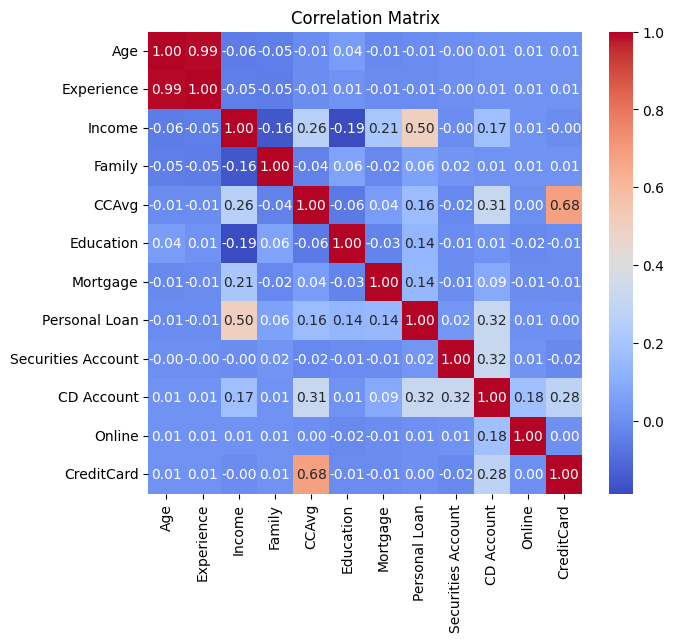

In [150]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We can see that columns that has high correlation as below: <br>
- `CCAvg` and `CreditCard` with 0.68 correlation
- `Income` and `Personal Loan` with 0.50 correlation
- `Experience` and `Age` with 0.99 correlation

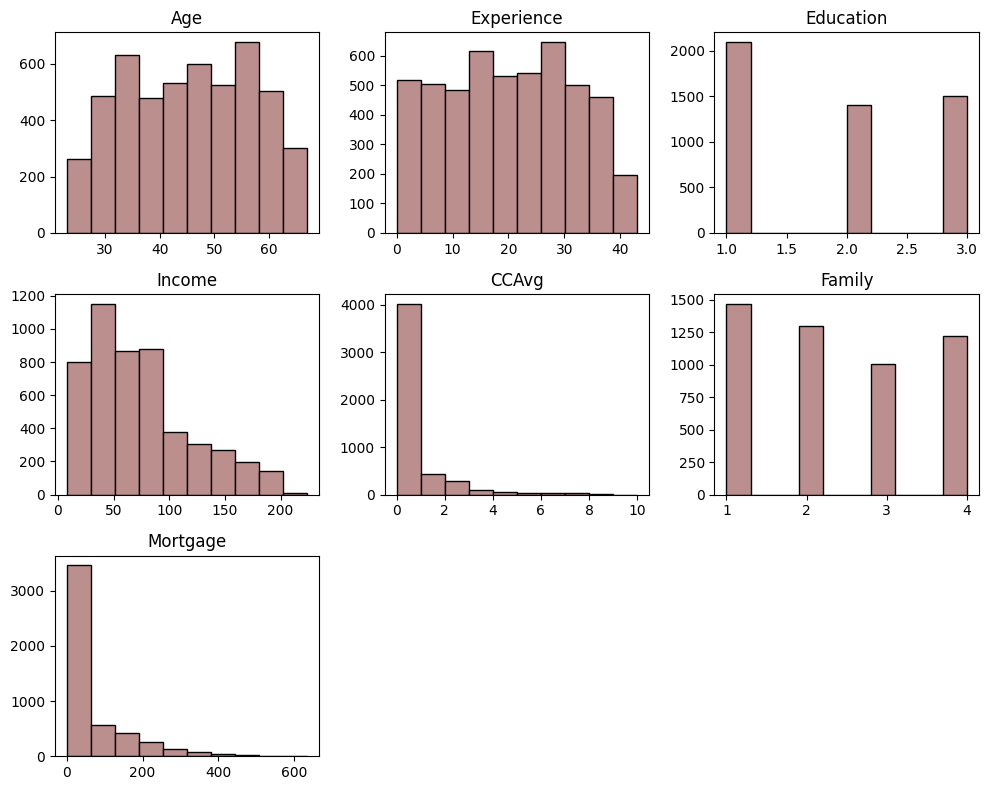

In [151]:
cols = ['Age', 'Experience', 'Education', 'Income', 'CCAvg', 'Family', 'Mortgage']
df[cols].hist(figsize=(10, 8), grid=False, color='rosybrown', edgecolor='black')
plt.tight_layout()
plt.show()

We can see that from the histogram plot:<br>
- `Age`: The age distribution has more people in their 30s and 50s than in other age groups.
- `Experience`: The experience distribution has more people having less experience (0-10 years) than more experience.
- `Education`: The education level distribution has peaks in 1.0 ,2.0, and 3.0
- `Income`: The income distribution is left-skewed with range 0-90 at most.
- `CCAvg`: The Credit card average spending is mostly in 0, indicating that there are many people with 0 spending in credit card. It is maybe caused by people not having credit cards as well.
- `Family`: The family size distribution is mostly in 1 member
- `Mortgage`: The mortgage distribution shows that many people has no mortgage to the bank

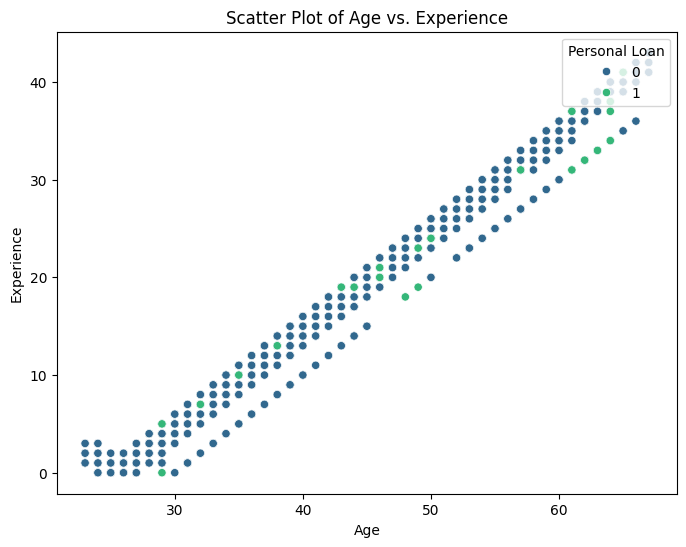

In [152]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Experience', hue='Personal Loan', palette='viridis')
plt.title('Scatter Plot of Age vs. Experience')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

In the previous plot, it is almost perfectly shown that the more the `Age`, the more `Experience` the person has.

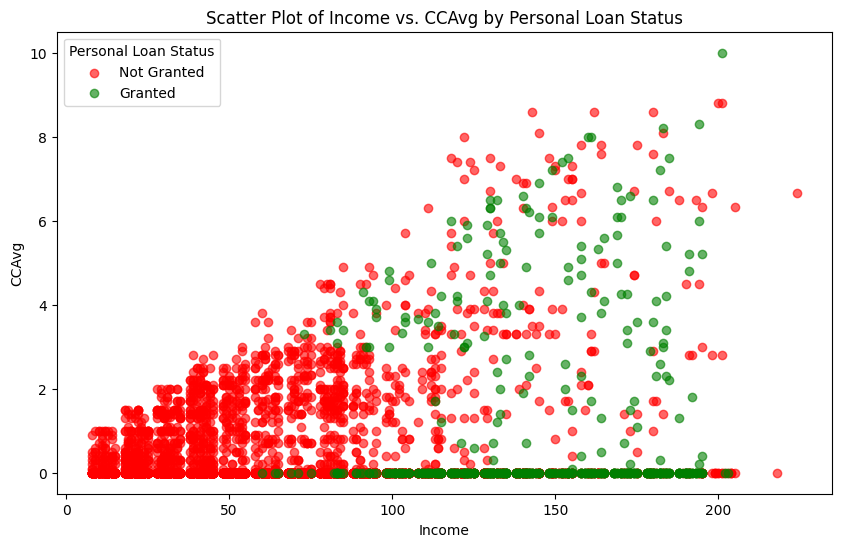

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(df[df['Personal Loan'] == 0]['Income'], df[df['Personal Loan'] == 0]['CCAvg'],
            color='red', label='Not Granted', alpha=0.6)

plt.scatter(df[df['Personal Loan'] == 1]['Income'], df[df['Personal Loan'] == 1]['CCAvg'],
            color='green', label='Granted', alpha=0.6)

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.title('Scatter Plot of Income vs. CCAvg by Personal Loan Status')
plt.legend(title='Personal Loan Status')

plt.show()

We can see from this scatter plot that people with higher `Income` has a higher chance to get the `Personal Loan` granted from the bank.

##### Data Splitting

In [154]:
df_input = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
df_target = df[['Personal Loan']]

In [155]:
x_train_val, x_test, y_train_val, y_test = train_test_split(df_input, df_target, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1111, random_state=42)

In [156]:
print("Training Data :", len(x_train))
print("Testing Data :", len(x_test))
print("Validation Data :", len(x_val))

Training Data : 4000
Testing Data : 500
Validation Data : 500


We have successfully split the data into 80% for `Training`, 10% for `Testing`, and another 10% for `Validation`

## Challenges & Difficulties

In [157]:
cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

def count_outliers_iqr(df):
    outliers_count = {}
    for col in df[cols]:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers_count

outliers_count_iqr = count_outliers_iqr(df)
length_data = df.shape[0]

print("Percentage of outliers in each column:")
for i in df[cols]:
    percentage_outliers = (outliers_count_iqr[i] / length_data) * 100
    print(i, ":", f"{percentage_outliers:.2f}%")

Percentage of outliers in each column:
Age : 0.00%
Experience : 0.00%
Income : 1.92%
CCAvg : 18.24%
Mortgage : 5.82%


#### Data Quality

- There are negative values in the `Experience` column, but it is already handles previously
- There are also incorrect data types in `CCAvg` column
- There are no missing values in the dataset
- Outliers were found in `Income`, `CCAvg`, and `Mortgage`

#### Data Type

#### Scaling

We need to do scaling for the numerical columns such as `Age`, `Experience`, `Income`, `Family`, `CCAvg`, `Mortgage` so that there will be no bias in the modelling process. We will use `MinMaxScaler` for the columns with no outlier and we will use `RobustScaler` with columns with outlier.

In [158]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Experience']
scaler = MinMaxScaler()
scaler.fit(x_train[columns_to_scale])

x_train_scaled = x_train.copy()
x_train_scaled[columns_to_scale] = scaler.transform(x_train[columns_to_scale])
x_train_scaled[columns_to_scale] = pd.DataFrame(x_train_scaled, columns=columns_to_scale)

x_test_scaled = x_test.copy()
x_test_scaled[columns_to_scale] = scaler.transform(x_test[columns_to_scale])
x_test_scaled[columns_to_scale] = pd.DataFrame(x_test_scaled, columns=columns_to_scale)

x_val_scaled = x_val.copy()
x_val_scaled[columns_to_scale] = scaler.transform(x_val[columns_to_scale])
x_val_scaled[columns_to_scale] = pd.DataFrame(x_val_scaled, columns=columns_to_scale)

In [159]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

columns_to_scale = ['Income', 'CCAvg', 'Mortgage']
scaler = RobustScaler()
scaler.fit(x_train[columns_to_scale])

x_train_scaled = x_train.copy()
x_train_scaled[columns_to_scale] = scaler.transform(x_train[columns_to_scale])
x_train_scaled[columns_to_scale] = pd.DataFrame(x_train_scaled, columns=columns_to_scale)

x_test_scaled = x_test.copy()
x_test_scaled[columns_to_scale] = scaler.transform(x_test[columns_to_scale])
x_test_scaled[columns_to_scale] = pd.DataFrame(x_test_scaled, columns=columns_to_scale)

x_val_scaled = x_val.copy()
x_val_scaled[columns_to_scale] = scaler.transform(x_val[columns_to_scale])
x_val_scaled[columns_to_scale] = pd.DataFrame(x_val_scaled, columns=columns_to_scale)

#### Data Imbalance

In [160]:
print("Counts of Personal Loan:")
print(df['Personal Loan'].value_counts())
print()

personal_loan_0 = (df['Personal Loan']==0).sum()
personal_loan_1 = (df['Personal Loan']==1).sum()
len_data = df.shape[0]

print("Percentage of Personal Loan")
print("Personal Loan 0 :", f"{(personal_loan_0/len_data)*100}%")
print("Personal Loan 1 :", f"{(personal_loan_1/len_data)*100}%")

Counts of Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64

Percentage of Personal Loan
Personal Loan 0 : 90.4%
Personal Loan 1 : 9.6%


There are class imbalance in `Personal Loan` column, so that we need to oversampling to create synthetic data for the minority class.

In [161]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_scaled, y_train= sm.fit_resample(x_train_scaled, y_train)

## Baseline Architecture

- n nodes input layer
- 2 buah hidden layer dengan banyak 2 × n nodes awal
- layer akhir banyak kelasnya
- activation function : ReLU

In this code below the activation function used in the last layer is linear and default for the optimizer and metric.

In [162]:
n_input = x_train.shape[1]
n_hidden = (2 * n_input)
num_class = 2

model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(n_input,)))

model.add(keras.layers.Dense(n_hidden, activation = 'relu'))
model.add(keras.layers.Dense(n_hidden, activation = 'relu'))
model.add(keras.layers.Dense(num_class, activation = 'linear'))

model.compile(loss = 'binary_crossentropy') # use default optimizer and metric
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 22)                264       
                                                                 
 dense_19 (Dense)            (None, 22)                506       
                                                                 
 dense_20 (Dense)            (None, 2)                 46        
                                                                 
Total params: 816 (3.19 KB)
Trainable params: 816 (3.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [163]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [164]:
model.fit(x_train_scaled, y_train, epochs = 10, validation_data=(x_val_scaled, y_val))

Epoch 1/10
226/226 [==============================] - 1s 3ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 2/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 3/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 4/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 5/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 6/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 7/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 8/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 9/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883
Epoch 10/10
226/226 [==============================] - 0s 2ms/step - loss: 7.6685 - val_loss: 1.2883

## Modified Architecture

Now we want to modify the architecture by adding droput layers to reduce overfitting by making a fraction of neurons into 0 and setting the activation function in the last layer into sigmoid, optimizer into adam, and metrics into accuracy because it suits for binary problem classification.

In [165]:
n_input = x_train.shape[1]
n_hidden = (2 * n_input)
num_class = 2

model2 = keras.models.Sequential()
model2.add(tf.keras.Input(shape=(n_input,)))

model2.add(keras.layers.Dense(n_hidden, activation = 'relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(n_hidden, activation = 'relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(num_class, activation = 'sigmoid')) # use sigmoid because the problem is binary

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 22)                264       
                                                                 
 dropout_6 (Dropout)         (None, 22)                0         
                                                                 
 dense_22 (Dense)            (None, 22)                506       
                                                                 
 dropout_7 (Dropout)         (None, 22)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 46        
                                                                 
Total params: 816 (3.19 KB)
Trainable params: 816 (3.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [166]:
model2.fit(x_train_scaled, y_train, epochs = 10, validation_data=(x_val_scaled, y_val))

Epoch 1/10
226/226 [==============================] - 2s 3ms/step - loss: 1.1656 - accuracy: 0.5379 - val_loss: 0.6703 - val_accuracy: 0.7080
Epoch 2/10
226/226 [==============================] - 1s 3ms/step - loss: 0.7045 - accuracy: 0.5812 - val_loss: 0.6406 - val_accuracy: 0.7700
Epoch 3/10
226/226 [==============================] - 1s 3ms/step - loss: 0.6507 - accuracy: 0.6249 - val_loss: 0.5754 - val_accuracy: 0.8340
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5761 - accuracy: 0.7028 - val_loss: 0.4434 - val_accuracy: 0.8680
Epoch 5/10
226/226 [==============================] - 1s 2ms/step - loss: 0.4660 - accuracy: 0.7958 - val_loss: 0.3885 - val_accuracy: 0.8500
Epoch 6/10
226/226 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8402 - val_loss: 0.3444 - val_accuracy: 0.8520
Epoch 7/10
226/226 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8598 - val_loss: 0.3636 - val_accuracy: 0.8440
Epoch 

## Model Evaluation

In [167]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred, axis=-1)
print('\nClassification Report for Model 1\n')
print(classification_report(y_test, y_pred, target_names=['0','1']))

16/16 [==============================] - 0s 2ms/step

Classification Report for Model 1

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       446
           1       0.00      0.00      0.00        54

    accuracy                           0.89       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.80      0.89      0.84       500



In [168]:
from sklearn.metrics import classification_report
y_pred2 = model2.predict(x_test_scaled)
y_pred2 = np.argmax(y_pred2, axis=-1)
print('\nClassification Report for Model 2\n')
print(classification_report(y_test, y_pred2, target_names=['0','1']))

16/16 [==============================] - 0s 2ms/step

Classification Report for Model 2

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       446
           1       0.56      0.94      0.70        54

    accuracy                           0.91       500
   macro avg       0.78      0.93      0.83       500
weighted avg       0.95      0.91      0.92       500



###### Penjelasan <br>
After analyzing the classification report for both models, it became evident that the modified model outperformed the baseline model in terms of accuracy. This outcome underscores the significant impact of incorporating a dropout layer and adjusting the activation function on the model's performance. It also highlights the critical consideration needed when selecting activation functions and integrating supplementary layers like dropout, emphasizing the importance of choosing these choices to the specific model and problem at hand.


1. Model 1 (Baseline Architecture):
- `Precision` for class 0 (non-loan approval) is high at 0.89, indicating that when the model predicts a non-loan approval, it's correct 89% of the time.
- However, `recall` for class 1 (loan approval) is very low at 0.00, meaning the model is not effectively identifying instances of loan approval.
- The `F1-score` for class 1 is also very low at 0.00, which suggests a lack of balance between precision and recall for loan approvals.
- The overall `accuracy` of the model is 0.89, which seems decent but is primarily driven by the high precision for non-loan approvals.
2. Model 2 (Modified Architecture):
- `Precision` for class 1 (loan approval) has improved significantly to 0.56, indicating that when the model predicts a loan approval, it's correct 56% of the time.
- `Recall` for class 1 has also improved substantially to 0.94, meaning the model is capturing a higher percentage of actual loan approvals.
- The `F1-score` for class 1 has also increased to 0.70, showing a better balance between precision and recall for loan approvals compared to Model 1.
- The overall `accuracy` of the model is 0.91, which is slightly higher than Model 1, indicating an improvement in overall predictive performance.<br><br>

**Insights:**

- Model 2, with the modified architecture including dropout layers and tuned activation functions, shows significant improvements in predicting loan approvals (class 1).
- The modifications have notably increased both precision and recall for class 1, leading to a higher F1-score and overall accuracy.
- The increase in recall for loan approvals suggests that Model 2 is better at identifying actual loan-worthy applicants, which is crucial for a bank's decision-making process.<br><br>
In summary, Model 2's modifications have made it more effective in predicting loan approvals, making it a better choice for the personal loan approval task in a bank compared to the baseline Model 1.

## Thank you